In [1]:
# Created by: Jessica Gallo

# Created: 3/8/2020
# Last Modified: 3/25/2020

# CSC 732 Pattern Recognition and Neural Networks
# Regression (Linear, Multiple, Quadratic, Cubic etc.)
# Using Logistic Regression for Prediction

In [2]:
# --------
# IMPORTS |
# --------
# Main Libraries
import numpy as np
import pandas as pd

# Visual Libraries
import matplotlib.pyplot as plt

# Sklearn Libraries
from sklearn.impute import SimpleImputer
import sklearn.model_selection as model_selection
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# from sklearn.svm import SVR
# import sys

In [3]:
# ------------------
# INSURANCE DATASET |
# ------------------
dataset = pd.read_csv("C:\\Users\\User\\Downloads\\insurance.csv")
# reading dataset
X = dataset.iloc[:, :-1].values
# X represents a matrix of independent variables
# the 1st ':' stands for all rows
# the second ':' stands for all the columns minus the last one (-1)
y = dataset.iloc[:, 6].values
# y represents a vector of the dependent variable
# all rows included, but from the columns we only need the 7th (6th index)

print('Original:'
      '\n=========')
print(dataset)

Original:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
# ===================
# DATA PREPROCESSING |
# ===================

In [5]:
# -------------
# MISSING DATA |
# -------------
imputer = SimpleImputer(missing_values=np.nan, strategy='constant')
# handles missing data & replaces NaN values
# strategy argument 'constant' replaces missing values with fill_value (for string/object datatypes)
imputer = imputer.fit(X[:, 1:6])
# fits the imputer on X
# # fits data to avoid data leakage during cross validation
X[:, 1:6] = imputer.transform(X[:, 1:6])
# imputes all missing values in X

print("\nImputed:"
      "\n========")
print(X)


Imputed:
[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [6]:
# ------------------------------------------------------------------------
# CONVERT CATEGORICAL TEXT DATA INTO MODEL-UNDERSTANDABLE NUMBERICAL DATA |
# ------------------------------------------------------------------------
labelencoder_X = LabelEncoder()
# encodes target lables with values between 0 and n_classes -1
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
# fit label encoder and return encoded labels
onehotencoder = OneHotEncoder(dtype=np.float)
# creates a binary column for each category and returns a sparse matrix or dense array
X = onehotencoder.fit_transform(X).toarray()
# fit OneHotEncoder to X, then transform X

print('\nEncoded:'
      '\n========')
print(X)


Encoded:
[[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [7]:
# ------------------------------------------------------
# SPLITTING DATASET INTO TRAINING, VALIDATION & TESTING |
# ------------------------------------------------------
# Splits arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=1)
# test_size represents the proportion of the dataset to include in the test split
# random_state is the seed used by the random number generator

print('\nSplitting Dataset:'
      '\n==================')
print('X_train: \n', X_train)
print('\ny_train: \n', y_train)
print('\nX_test: \n', X_test)
print('\ny_test: \n', y_test)
print('\nX_val: \n', X_val)
print('\ny_val: \n', y_val)


Splitting Dataset:
X_train: 
 [[0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]

y_train: 
 [ 8410.04685  11884.04858  40904.1995    3861.20965  37079.372
  4058.1161    2395.17155   1880.07     12629.1656    4718.20355
 11741.726     8556.907    26236.57997   2866.091     6406.4107
  3393.35635  11830.6072    9174.13565   2254.7967   62592.87309
  3947.4131    8027.968    46130.5265    9778.3472   10107.2206
 20745.9891    1708.0014    3171.6149    4934.705    42211.1382
  4438.2634    6571.02435   1702.4553    7345.084     7196.867
 10564.8845   17352.6803    8965.79575   6203.90175   4889.9995
 10579.711    11833.7823    2775.19215   8211.1002   43943.8761
  9850.432     8457.818     5240.765     6238.298     2020.5523
  2566.4707   16085.1275   17560.37975   5031.26955  13880.949
 23967.38305  12928.7911    6117.4945    7726.854     7153.5539
  5989.52365   3481.868     4518.8

 [ 4795.6568  37701.8768   9800.8882  16138.76205 52590.82939 14133.03775
  7639.41745  3736.4647   9290.1395  21223.6758   3866.8552   6079.6715
  6640.54485  4428.88785  4040.55825  9140.951   20009.63365 25992.82104
 20277.80751  2727.3951  11512.405    8547.6913  12231.6136  21797.0004
  6610.1097  37465.34375  1633.9618   3500.6123   5488.262    9715.841
 21774.32215  2207.69745 15019.76005 47928.03    18903.49141  6360.9936
  2396.0959  43254.41795  1261.859    7281.5056  34828.654    2643.2685
 13822.803   10713.644    9910.35985 45863.205    8582.3023   8068.185
 12233.828    4134.08245  5003.853   14235.072   12638.195    5246.047
  2128.43105 11187.6567   6775.961   10450.552   37270.1512  12244.531
  4646.759   21098.55405 36021.0112   5327.40025  1917.3184  19594.80965
 25081.76784 27000.98473  7418.522   13041.921   41097.16175  4454.40265
  5972.378    5966.8874  11085.5868   8280.6227   9432.9253  24520.264
  4449.462    2250.8352  11763.0009  15828.82173  6059.173    63

In [8]:
# -----------------
# Cross Validation |
# -----------------
# Provides train/trest indices to split data in train.test sets
# Each fold is then used once as a validation while the k-1 remaining folds from the training set
kf = KFold(n_splits=5)  # number of folds is 5
X = np.array(X)
y = np.array(y)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('\nCross Validation:'
          '\n=================')
    print('X_test: \n', X_test)


Cross Validation:
X_test: 
 [[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Cross Validation:
X_test: 
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Cross Validation:
X_test: 
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]

Cross Validation:
X_test: 
 [[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

Cross Validation:
X_test: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [9]:
# --------------------------------------------------------
# FITTING MULTIPLE REGRESSION MODELS TO THE TRAINGING SET |
# --------------------------------------------------------
# Fits a linear model with coefficients w to minimize the residual sum of squares between
# the observed targets in the dataset, and the targets predicted by the linear approximation
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
# retrieve the intercept

print(regressor.coef_)
# retrieves the slope (coefficient of X)

-2.2307245015338618e+17
[-4.32291072e+16 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16
 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16
 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16
 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16
 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16
 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16
 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16
 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16
 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16
 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16
 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16
 -4.32291072e+16 -4.32291072e+16 -4.32291072e+16  1.10981199e+17
  1.10981199e+17 -1.75720683e+15 -1.75720683e+15 -1.75720683e+15
 -1.75720683e+15 -1.75720683e+15 -1.75720683e+15 -1.75720683e+15
 -1.75720683e+15 -1.75720683e+15 -1.75720683e+15  2.52147324e+17
 

In [10]:
# ----------------------------
# PREDICTING THE TEST RESULTS |
# ----------------------------
y_pred = regressor.predict(X_test)

print('Predicting test set results')
print(X_test)

dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(dataset)

Predicting test set results
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]
          Actual     Predicted
0    13974.45555  7.104000e+03
1     1909.52745  1.408000e+03
2    12096.65120  1.459200e+04
3    13204.28565  9.248000e+03
4     4562.84210  4.992000e+03
..           ...           ...
262  10600.54830 -1.232883e+17
263   2205.98080  7.872000e+03
264   1629.83350  5.376000e+03
265   2007.94500  2.240000e+02
266  29141.36030  2.793600e+04

[267 rows x 2 columns]


In [11]:
# --------------------------
# METHOD OF FEATURE SCALING |
# --------------------------

In [12]:
# ----------------
#  STANDARDSCALER |
# ----------------
# Computes mean and standard deviation on a training set so as to be able to later
# reapply the same transformation on the testing set.
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print("\nStandardScalar:"
      "\n==============="
      "\nX_train:\n", X_train)
print('\nX_test: \n', X_test)


StandardScalar:
X_train:
 [[-0.22589914  4.17917662 -0.13794744 ... -0.55757826 -0.61656682
   1.76613441]
 [ 4.42675432 -0.23928158 -0.13794744 ... -0.55757826  1.62188424
  -0.56620832]
 [-0.22589914 -0.23928158 -0.13794744 ... -0.55757826  1.62188424
  -0.56620832]
 ...
 [-0.22589914 -0.23928158 -0.13794744 ...  1.79347022 -0.61656682
  -0.56620832]
 [-0.22589914 -0.23928158 -0.13794744 ... -0.55757826  1.62188424
  -0.56620832]
 [-0.22589914 -0.23928158 -0.13794744 ... -0.55757826  1.62188424
  -0.56620832]]

X_test: 
 [[-0.22589914 -0.23928158 -0.13794744 ... -0.55757826 -0.61656682
  -0.56620832]
 [-0.22589914 -0.23928158 -0.13794744 ...  1.79347022 -0.61656682
  -0.56620832]
 [-0.22589914 -0.23928158 -0.13794744 ... -0.55757826 -0.61656682
  -0.56620832]
 ...
 [ 4.42675432 -0.23928158 -0.13794744 ... -0.55757826  1.62188424
  -0.56620832]
 [-0.22589914 -0.23928158 -0.13794744 ... -0.55757826 -0.61656682
   1.76613441]
 [-0.22589914 -0.23928158 -0.13794744 ...  1.79347022 -0.616

In [13]:
# --------------
#  MINMAXSCALAR |
# --------------
# Scaling features to lie between a given minimum and maximum value, often between 0 and 1
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

print("\nMinMaxScalar:"
      "\n============="
      "\nX_train:\n", X_train)
print('\nX_test:\n', X_test)


MinMaxScalar:
X_train:
 [[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

X_test:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [14]:
# --------------
#  ROBUSTSCALAR |
# --------------
# This removed the median and scaled the data according to the quantile range
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)

print("\nRobustScalar:"
      "\n============="
      "\nX_train:\n", X_train)
print('\nX_test:\n', X_test)


RobustScalar:
X_train:
 [[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

X_test:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [15]:
# --------------
#  NORMALIZER   |
# --------------
# Normalize samples individually to unit norm
# Each sample (each row of the data matrix) with at least one non zero component is rescaled
# indepentently o other samples so that its norm (|1 or |2) equals 1
normalizer_scaler = Normalizer()
X_train = normalizer_scaler.fit_transform(X_train)
X_test = normalizer_scaler.transform(X_test)

print("\nNormalizer:"
      "\n==========="
      "\nX_train:\n", X_train)
print('\nX_test:\n', X_test)


Normalizer:
X_train:
 [[0.         0.35355339 0.         ... 0.         0.         0.35355339]
 [0.5        0.         0.         ... 0.         0.5        0.        ]
 [0.         0.         0.         ... 0.         0.5        0.        ]
 ...
 [0.         0.         0.         ... 0.5        0.         0.        ]
 [0.         0.         0.         ... 0.         0.40824829 0.        ]
 [0.         0.         0.         ... 0.         0.40824829 0.        ]]

X_test:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.5        0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.40824829 0.         0.         ... 0.         0.40824829 0.        ]
 [0.         0.         0.         ... 0.         0.         0.40824829]
 [0.         0.         0.         ... 0.35355339 0.         0.        ]]


In [16]:
# -------------------------------------------------------------
# OPTIMAL MODEL USING BACKWARD ELIMINATION (FEATURE SELECTION) |
# -------------------------------------------------------------
import statsmodels.api as sm
X = np.append(arr=np.ones((1338, 1)).astype(int), values=X, axis=1)
# add one column with all 50 values as 1 to represent b0x0

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
# endog is the dependent variable & exog is the independent variable
print('\n', regressor_OLS.summary())

# remove index x6 as it has the highest p-value
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
print('\n', regressor_OLS.summary())

# remove index x3 as it has the highest p-value
X_opt = X[:, [0, 1, 2, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
print('\n', regressor_OLS.summary())

# remove index x4 as it has the highest p-value
X_opt = X[:, [0, 1, 2, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
print('\n', regressor_OLS.summary())

# remove index x3 as it has the highest p-value
X_opt = X[:, [0, 1, 2]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
print('\n', regressor_OLS.summary())

# remove index x2 as it has the highest p-value
X_opt = X[:, [0, 1]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
print('\n', regressor_OLS.summary())
# now all variables are under the significance level of 0.05
# the only one variable left has the highest impact on the profit and is statistically significant


                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     8.525
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           4.15e-09
Time:                        21:45:25   Log-Likelihood:                -14452.
No. Observations:                1338   AIC:                         2.892e+04
Df Residuals:                    1331   BIC:                         2.896e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.429e+04    361.092     39.578      0

In [17]:
#############################################################################

In [18]:
# ================
# DATA PROCESSING |
# ================

In [19]:
# --------------
# Normalization |
# --------------

In [20]:
# Normalize all input data to 0 and 1
def _normalize_column_0_1(X, train=True, specified_column=None, X_min=None, X_max=None):
    # The output of the function will make the specified column of the training data from 0 to 1
    # When processing testing data,k we need to normalize by the value we used for processing training, so we must
    # save the max value of the training data
    if train:
        if specified_column is None:
            specified_column = np.arange(X.shape[1])
            # np.arange returns evenly spaced values within a given interval
        length = len(specified_column)
        # returns the number of items
        X_max = np.reshape(np.max(X[:, specified_column], 0), (1, length))
        # np.reshape gives a new shape to an array without changing its data
        # np.max finds the value of maximum element in the entire array (returning scalar)
        X_min = np.reshape(np.min(X[:, specified_column], 0), (1, length))
        # np.min returns the minimum of an array or minimum along an axis
        print('\n_normalize_column_0_1:')
        print('X_max is \n' + str(X_max))
        print('X_min is \n' + str(X_min))
        print('specified_column is \n' + str(specified_column))

    np.seterr(divide='ignore', invalid='ignore')
    # code is trying to divide by zero, this ignores the runtime error

    X[:, specified_column] = np.divide(np.subtract(X[:, specified_column], X_min), np.subtract(X_max, X_min))
    # np.divide returns a true division of the inputs, element-wise
    # np.subtract subtracts arguments, element-wise

    return X, X_max, X_min


print('_normalize_column_0_1:'
      '\n======================\n', X)

_normalize_column_0_1(X)

_normalize_column_0_1:
 [[1. 0. 1. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]]

_normalize_column_0_1:
X_max is 
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

(array([[nan,  0.,  1., ...,  0.,  0.,  1.],
        [nan,  1.,  0., ...,  0.,  1.,  0.],
        [nan,  0.,  0., ...,  0.,  1.,  0.],
        ...,
        [nan,  1.,  0., ...,  0.,  1.,  0.],
        [nan,  0.,  0., ...,  0.,  0.,  1.],
        [nan,  0.,  0., ...,  1.,  0.,  0.]]),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [21]:
# Normalize the specified column to a normal distribution
def _normalize_column_normal(X, train=True, specified_column=None, X_mean=None, X_std=None):
    # The output of the function will make the specified column number to become a Normal Distribution
    # When processing testing data, we need to normalize by the value we used for processing traing, so we must
    # save the mean value and the variance of the training data
    if train:
        if specified_column is None:
            specified_column = np.arange(X.shape[0])
        length = len(specified_column)
        X_mean = np.reshape(np.mean(X[:, specified_column], 0), (1, length))
        X_std = np.reshape(np.std(X[:, specified_column], 0), (1, length))

    X[:, specified_column] = np.divide(np.subtract(X[:, specified_column], X_mean), X_std)

    return X, X_mean, X_std


print('\n_normalize_column_normal:'
      '\n=========================\n', X)


_normalize_column_normal:
 [[nan  0.  1. ...  0.  0.  1.]
 [nan  1.  0. ...  0.  1.  0.]
 [nan  0.  0. ...  0.  1.  0.]
 ...
 [nan  1.  0. ...  0.  1.  0.]
 [nan  0.  0. ...  0.  0.  1.]
 [nan  0.  0. ...  1.  0.  0.]]


In [22]:
# Makes the data random and clean and changes the order
def _shuffle(X, Y):
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    # shuffles the array along the 1st axis of a multi-dimensional array
    # the order of sub-arrays is changed but their contents remains the same
    return X[randomize], Y[randomize]


print('\n_shuffle: '
      '\n=========\n')
_shuffle(X, y)


_shuffle: 



(array([[nan,  0.,  0., ...,  0.,  0.,  1.],
        [nan,  0.,  0., ...,  0.,  0.,  1.],
        [nan,  1.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan,  0.,  0., ...,  0.,  0.,  0.],
        [nan,  0.,  0., ...,  1.,  0.,  0.],
        [nan,  0.,  0., ...,  0.,  0.,  0.]]),
 array([ 3987.926  ,  7726.854  ,  1702.4553 , ...,  4915.05985,
        30284.64294, 42111.6647 ]))

In [23]:
# Divide the data and choose according to the proportion
def train_dev_split(X, y, dev_size=0.25):
    train_len = int(round(len(X) * (1 - dev_size)))
    return X[0:train_len], y[0:train_len], X[train_len:None], y[train_len:None]


print('\ntrain_dev_split:'
      '\n================')
print(X, '\n', y)


train_dev_split:
[[nan  0.  1. ...  0.  0.  1.]
 [nan  1.  0. ...  0.  1.  0.]
 [nan  0.  0. ...  0.  1.  0.]
 ...
 [nan  1.  0. ...  0.  1.  0.]
 [nan  0.  0. ...  0.  0.  1.]
 [nan  0.  0. ...  1.  0.  0.]] 
 [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [24]:
col = [0,1,3,4,5,7,10,12,25,26,27,28]
X_train, X_mean, X_std = _normalize_column_normal(X_train, specified_column=col)

In [25]:
# -------------------------
# LOGISTIC REGRESSION TOOL |
# -------------------------

In [26]:
def _sigmoid(z):
    # sigmoid function can be used to output probability
    # limits the output to a range between 0 and 1
    return np.clip(1 / (1.0 + np.exp(-z)), 1e-6, 1-1e-6)
    # 1e-6 is equivalent to 1 with 6 zeros (1,000,000)
    
_sigmoid(0)
# test to make sure it works

0.5

In [27]:
def get_prob(X, w, b):
    # the probability to output 1
    return _sigmoid(np.add(np.matmul(X, w), b))
    # np.matmul matrix product of 2 arrays
    # np.add adds arguments element-wise

In [28]:
def infer(X, w, b):
    # use round to infer the result
    return np.round(get_prob(X, w, b))

In [29]:
def _cross_entropy(y_pred, y_label):
    # compute the cross entropy
    # used to quantify the difference between 2 probability distributions
    cross_entropy = -np.dot(y_label, np.log(y_pred))-np.dot((1-y_label), np.log(1-y_pred))
    # np.dot is the dot product of 2 arrays
    # np.log = natural logarithm
    return cross_entropy

In [30]:
def _gradient(X, y_label, w, b):
    # return the mean of the gradient
    y_pred = get_prob(X, w, b)
    pred_error = y_label - y_pred
    w_grad = -np.mean(np.multiply(pred_error.T, X.T), 1)
    b_grad = -np.mean(pred_error)
    return w_grad, b_grad

In [31]:
def _gradient_regularization(X, y_label, w, b, lamda):
    # return the mean of the gradient
    y_pred = get_prob(X, w, b)
    pred_error = y_label - y_pred
    w_grad = -np.mean(np.multiply(pred_error.T, X.T), 1) + lamda * w
    # .T transposes the array
    b_grad = -np.mean(pred_error)
    return w_grad, b_grad

In [32]:
def _loss(y_pred, y_label, lamda, w):
    return _cross_entropy(y_pred, y_label)+lamda*np.sum(np.square(w))

In [33]:
def accuracy(y_pred, y_label):
    acc = np.sum(y_pred == y_label) / len(y_pred)
    return acc

In [34]:
# --------------------
# Logistic Regression |
# --------------------

In [35]:
def train(X_train, y_train):
    # split a validation set
    dev_size = 0.1155
    X_train, y_train, X_dev, y_dev = train_dev_split(X_train, y_train, dev_size=dev_size)

    # Use 0 + 0*x1 + 0*x2 + ... for weight initialization
    w = np.zeros((X_train.shape[1],))
    b = np.zeros((1,))
    regularize = True
    if regularize:
        lamda = 0.001
    else:
        lamda = 0

    max_iter = 40  # max iteration number
    batch_size = 32  # number to feed in the model for average to avoid bias
    learning_rate = 0.2  # how much the model learn for each step
    num_train = len(y_train)
    num_dev = len(y_dev)
    step = 1

    loss_train = []
    loss_validation = []
    train_acc = []
    dev_acc = []

    for epoch in range(max_iter):
        # Random shuffle for each epoch
        X_train, y_train = _shuffle(X_train, y_train)

        total_loss = 0.0
        # Logistic regression train with batch
        for idx in range(int(np.floor(len(y_train)/batch_size))):
            X = X_train[idx*batch_size:(idx+1)*batch_size]
            y = y_train[idx*batch_size:(idx+1)*batch_size]

            # Find out the gradient of the loss
            w_grad, b_grad = _gradient_regularization(X, y, w, b, lamda)
            # gradient descent update
            # learning rate decay with time
            w = w - learning_rate/np.sqrt(step) * w_grad
            b = b - learning_rate/np.sqrt(step) * b_grad

            step = step+1

        # Compute the loss and the accuracy of the training set and the validation set
        y_train_pred = get_prob(X_train, w, b)
        y_train_pred = np.round(y_train_pred)
        train_acc.append(accuracy(y_train_pred, y_train))
        loss_train.append(_loss(y_train_pred, y_train, lamda, w)/num_train)
        y_dev_pred = get_prob(X_dev, w, b)
        y_dev_pred = np.round(y_dev_pred)
        dev_acc.append(accuracy(y_dev_pred, y_dev))
        loss_validation.append(_loss(y_dev_pred, y_dev, lamda, w)/num_dev)

    return w, b, loss_train, loss_validation, train_acc, dev_acc  # return loss for plotting

In [36]:
# return loss is to plot the result
w, b, loss_train, loss_validation, train_acc, dev_acc = train(X_train, y_train)

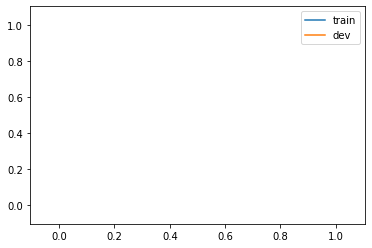

In [37]:
plt.plot(loss_train)
plt.plot(loss_validation)
plt.legend(['train', 'dev'])
plt.show()

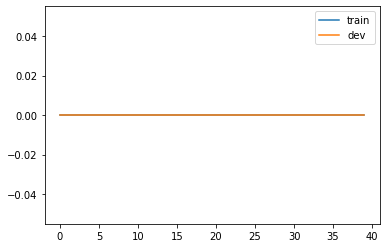

In [38]:
plt.plot(train_acc)
plt.plot(dev_acc)
plt.legend(['train', 'dev'])
plt.show()

In [39]:
#############################################################################
# -----------------------------
#  TEST DATA AND OUTPUT RESULT |
# -----------------------------
#############################################################################

In [40]:
'''
X_train_fpath = sys.argv[1]
Y_train_fpath = sys.argv[2]
X_test_fpath = sys.argv[3]
output_fpath = sys.argv[4]


X_train_fpath = 'data/X_train'
Y_train_fpath = 'data/Y_train'
X_test_fpath = 'data/X_test'
output_fpath = 'output.csv'
'''

"\nX_train_fpath = sys.argv[1]\nY_train_fpath = sys.argv[2]\nX_test_fpath = sys.argv[3]\noutput_fpath = sys.argv[4]\n\n\nX_train_fpath = 'data/X_train'\nY_train_fpath = 'data/Y_train'\nX_test_fpath = 'data/X_test'\noutput_fpath = 'output.csv'\n"

In [43]:
X_train = np.genfromtxt(dataset, delimiter=',', skip_header=1)
Y_train = np.genfromtxt(dataset, delimiter=',', skip_header=1)
# np.genfromtxt loads data from a text file, with missing values handled as specified
# each line past the first skip_header line is split at the delimiter character and
# characters following the comments characters are discarded

In [46]:
X_test = np.genfromtxt(dataset, delimiter=',', skip_header=1)
# Do the same data process to the test data
X_test, _, _ = _normalize_column_normal(X_test, train=False, specified_column=col, X_mean=X_mean, X_std=X_std)

IndexError: too many indices for array

In [ ]:
result = infer(X_test, w, b)

In [ ]:
with open(output_fpath, 'w') as f:
    f.write('id,label\n')
    for i, v in enumerate(result):
        f.write('%d,%d\n' % (i+1, v))

ind = np.argsort(np.abs(w))[::-1]
with open(X_test_fpath) as f:
    content = f.readline().rstrip('\n')
features = np.array([x for x in content.split(',')])
for i in ind[0:10]:
    print(features[i], w[i])